<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/Markowitz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from numpy.linalg import *
import os

In [2]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 138 (delta 2), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (138/138), 1.80 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [3]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src/project3/

/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3


In [0]:
#Load data
os.chdir('/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/')
file_chdir = os.getcwd()
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv':
      filecsv_list.append(file)
R = pd.DataFrame()
for csv in filecsv_list:
  data = pd.read_csv(csv)
  #calculate return
  R[csv.strip('.csv')] = np.array([((data['Adj Close'][j]/data['Adj Close'][j-1])-1) for j in range(1,len(data['Adj Close']))])
 

In [0]:
#Find the break points for every year
break_points = []
break_points.append(0)
break_points.append(data[data['Date'].isin(['2012-10-18'])].index[0])
break_points.append(data[data['Date'].isin(['2014-10-17'])].index[0])
break_points.append(data[data['Date'].isin(['2019-10-18'])].index[0])

In [56]:
break_points

[0, 757, 1258, 2517]

In [0]:
#Expected returns 
R_expect_1 = np.array(R[break_points[2]:break_points[3]].mean()).reshape(-1,1)
R_expect_2 = np.array(R[break_points[1]:break_points[3]].mean()).reshape(-1,1)
R_expect_3 = np.array(R[break_points[0]:break_points[3]].mean()).reshape(-1,1)

In [0]:
R_cov =  np.array(R[break_points[2]:break_points[3]].cov())
R_expect = R_expect_1
one = np.ones((len(R_expect),1))
A = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),R_expect)
B = np.dot(np.dot(R_expect.reshape(1,-1),inv(R_cov)),R_expect)
C = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),one)
D = B*C - A**2
g = (B * np.dot(inv(R_cov), one) - A* np.dot(inv(R_cov), R_expect))/D
h = (C * np.dot(inv(R_cov), R_expect) - A* np.dot(inv(R_cov), one))/D
min_sigma = np.dot(np.dot(g.reshape(1,-1),R_cov),g) - (np.dot(np.dot(h.reshape(1,-1),R_cov),g)**2)/np.dot(np.dot(h.reshape(1,-1),R_cov),h)

In [74]:
min_sigma

array([[4.40130489e-05]])

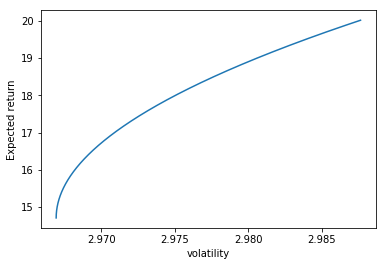

In [111]:
sigma = []
mu = []
weight = []
before_ = np.inf
for i in range(30000,50000):
    w = g + h*0.00000001*i
    sigma_ = np.sqrt(np.dot(np.dot(w.reshape(1,-1),R_cov),w)*len(R_expect_1))*100
    if sigma_ > before_:
      sigma.append(sigma_[0][0])
      weight.append(w)
      mu.append(((1+0.00000001*i)**365 - 1)*100)
    before_ = sigma_[0][0]
plt.plot(sigma,mu)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.show()